# Association Rules

Using FPGrowth to find frequent patterns and association rules between products

## Setup And Exploration

In [3]:
import pandas as pd

In [4]:
sales = pd.read_csv('datasets/retail_online.csv')
sales.head()

,invoice_number,stock_code,quantity,invoice_date,unit_price,customer_id,country,description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,White Hanging Heart T-Light Holder
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,White Metal Lantern
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Cream Cupid Hearts Coat Hanger
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Knitted Union Flag Hot Water Bottle
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Red Woolly Hottie White Heart


## Extracting Transactions

In [5]:
transactions = [list(item['description'])
                for _, item in sales.groupby('invoice_number')]

transactions[:5]

[['White Hanging Heart T-Light Holder',
  'White Metal Lantern',
  'Cream Cupid Hearts Coat Hanger',
  'Knitted Union Flag Hot Water Bottle',
  'Red Woolly Hottie White Heart',
  'Set 7 Babushka Nesting Boxes',
  'Glass Star Frosted T-Light Holder'],
 ['Hand Warmer Union Jack', 'Hand Warmer Red Polka Dot'],
 ['Assorted Colour Bird Ornament',
  "Poppy'S Playhouse Bedroom",
  "Poppy'S Playhouse Kitchen",
  'Feltcraft Princess Charlotte Doll',
  'Ivory Knitted Mug Cosy',
  'Box Of 6 Assorted Colour Teaspoons',
  'Box Of Vintage Jigsaw Blocks',
  'Box Of Vintage Alphabet Blocks',
  'Home Building Block Word',
  'Love Building Block Word',
  'Recipe Box With Metal Heart',
  'Doormat New England'],
 ['Jam Making Set With Jars',
  'Red Coat Rack Paris Fashion',
  'Yellow Coat Rack Paris Fashion',
  'Blue Coat Rack Paris Fashion'],
 ['Bath Building Block Word']]

## Find Association Rules

In [6]:
import pyfpgrowth as fpg

patterns = fpg.find_frequent_patterns(transactions[200:210], support_threshold=2) # Using just 10 items to get associations due to performance issues
association_rules = fpg.generate_association_rules(patterns, confidence_threshold=0.8)

dict(list(association_rules.items())[:5]) # Show the first 5 rules

{('Assorted Colour Bird Ornament',): (('Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Grow Your Own Basil In Enamel Mug',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'),
  1.0),
 ('Grow Your Own Basil In Enamel Mug',): (('Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'),
  3.0),
 ('Cut Glass Hexagon T-Light Holder',): (('Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'),
  1.0),
 ('Clam Shell Small',): (('Airline Bag Vintage Tokyo 78', 'Photo Cube'),
  6.666666666666667),
 ('Assorted Colour Bird Ornament',
  'Grow Your Own Basil In Enamel Mug'): (('Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'), 1.0)}

In [7]:
def parse_rules(assoc_rules):
     return [{'lhs': list(k),
              'rhs': list(v[0]),
              'conf': v[1]}
             for k, v in assoc_rules.items()]

In [8]:
rules = parse_rules(association_rules)
rules[:5]

[{'lhs': ['Assorted Colour Bird Ornament'],
  'rhs': ['Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Grow Your Own Basil In Enamel Mug',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'],
  'conf': 1.0},
 {'lhs': ['Grow Your Own Basil In Enamel Mug'],
  'rhs': ['Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'],
  'conf': 3.0},
 {'lhs': ['Cut Glass Hexagon T-Light Holder'],
  'rhs': ['Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Photo Cube',
   'Tv Dinner Tray Dolly Girl'],
  'conf': 1.0},
 {'lhs': ['Clam Shell Small'],
  'rhs': ['Airline Bag Vintage Tokyo 78', 'Photo Cube'],
  'conf': 6.666666666666667},
 {'lhs': ['Assorted Colour Bird Ornament',
   'Grow Your Own Basil In Enamel Mug'],
  'rhs': ['Airline Bag Vintage Tokyo 78',
   'Clam Shell Small',
   'Cut Glass Hexagon T-Light Holder',
   'Photo Cube',
   'Tv Dinner Tray Dolly Gi

## Exploring Associations (Graph)

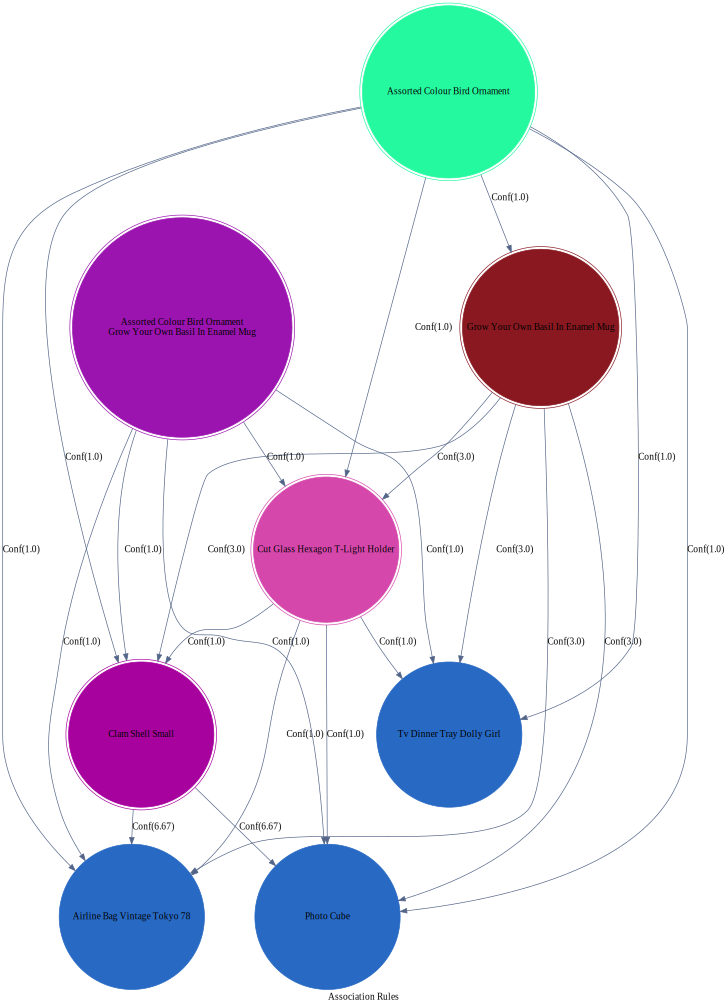

In [9]:
from graphviz import Digraph
from random import randint

def plot_graph(*rules, figsize=(14,14), nodesize=(3,3), fontcolor='black'):
    graph = Digraph()
    
    graph_width, graph_heigth = figsize
    node_width, node_heigth = nodesize
    
    node_attrs = {'width': str(node_width), 'height': str(node_heigth)}
    for rule in rules:
        lhs = '\n'.join(rule['lhs'])
        conf = rule['conf']
        
        graph.attr(size=f'{graph_width},{graph_heigth}',
               shape='doublecircle',
               bgcolor='transparent',
               fontcolor=fontcolor,
               label='Association Rules')
    
        graph.attr('node', shape='circle',
                   color='#2769c3',
                   style='filled',
                   fontcolor=fontcolor)

        color = "#{:06x}".format(randint(0, 0xFFFFFF))
        graph.node(lhs, shape='doublecircle', color=color)
        for rhs in rule['rhs']:
            graph.node(rhs, **node_attrs)
            graph.edge(lhs, rhs,
                       color='#526488',
                       fontcolor=fontcolor,
                       label=f'Conf({round(conf, 2)})')
    
    return graph

plot_graph(*rules[:5])

*Notes:*

Lazy evaluation: The nature of model has performance issues, so the model takes to much time to run.